Based on models generated by Dr. Hoyt Long, Professor of Japanese Literature and Cultural Analytics at Department of East Asian Languages and Civilizations at the University of Chicago, for *The Values in Numbers* (2021, Columbia University Press).

In [62]:
from pathlib import Path
from tqdm import tqdm
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Read input file (Japanese-language .txt file)
model_path = Path(input('Input data path... (relative to this Jupyter notebook)'))
print('Reading from {}'.format(model_path))
model = KeyedVectors.load_word2vec_format(model_path)

Reading from ..\..\..\Values_in_Numbers\Chapter5\results_fic_bootstrap\word2vec_bootstrap\model_0.txt


In [36]:
model.most_similar('理解')

[('了解', 0.7292919158935547),
 ('表現', 0.7051001191139221),
 ('同情', 0.7027379274368286),
 ('客観', 0.6998234391212463),
 ('信頼', 0.6977863311767578),
 ('偏見', 0.6905302405357361),
 ('励まし', 0.6868546605110168),
 ('かかずらう', 0.6837910413742065),
 ('表明', 0.6808236241340637),
 ('忖度', 0.6777454614639282)]

In [98]:
model.n_similarity('機械', '機器')

0.85219383

# Plotting word vectors

In [99]:
selected_words = random.sample(model.index_to_key, 50) # select ten random words

print('Selected words:', selected_words)
selected_vectors = model[selected_words]

Selected words: ['下側', '日当', '仮宅', '独座', '悪例', 'トウイン', '降り敷く', '出典', '白状', '噛み締める', '請け出す', '伊吹', '纓', '處刑', '胃壁', '完備', 'リユツクサツク', '前部', '大腸', '掘り子', 'カラスモリ', '先の日', '必滅', '遺跡', '夜長', 'カタオカ', '馬賊', '台帳', '彫り物', '俘囚', '自彊', '嶮山', 'ハルジ', '目文字', '蛇', '片棒', '椰子', '草', 'ひしと', '買い出し', 'カムフラージュ-camouflage', '若木', '弾音', '手巻き', '際会', '玄孫', '老中', '似寄る', '留別', '寒苦']


In [100]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, init='random', perplexity=30)
tsne_df = tsne.fit_transform(selected_vectors)
tsne_df = np.transpose(tsne_df)

In [111]:
# Use DBSCAN to identify clusters
clustering = DBSCAN(eps=2, min_samples=2).fit(selected_vectors)

[ 0 -1  0  0  0 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0  0  0  0 -1
 -1 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0 -1 -1
  0  0]
C:\Users\brandon\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\brandon\AppData\Roaming\Python\Python37\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\brandon\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\brandon\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarnin

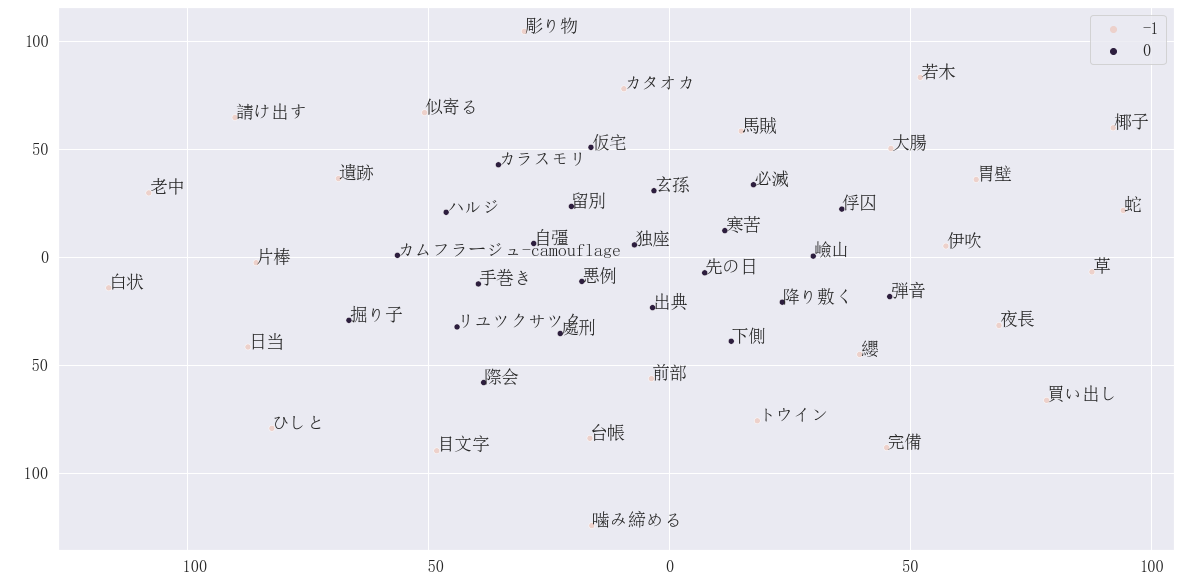

In [112]:
# Plot in 2D
sns.set(rc={'figure.figsize': (20, 10)})
sns.set(font='SimSun', font_scale=1.5)

print(clustering.labels_)
sns.scatterplot(*tsne_df, hue=clustering.labels_)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (tsne_df[0][i], tsne_df[1][i]))

plt.show()